# Load required libraries & extract data

In [1]:
# Libraries needed for the importing the csv file

import pandas as pd
import requests
import io
    
# Downloading the csv file from your GitHub account

url = "https://raw.githubusercontent.com/simoneSantoni/data-viz-smm635/master/data/koopAndTobias/koop_tobias.csv" 
# Make sure the url is the raw version of the file on GitHub

download = requests.get(url).content

In [2]:
# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17919 entries, 0 to 17918
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PERSONID   17919 non-null  int64  
 1   EDUC       17919 non-null  int64  
 2   LOGWAGE    17919 non-null  float64
 3   POTEXPER   17919 non-null  int64  
 4   TIMETRND   17919 non-null  int64  
 5   ABILITY    17919 non-null  float64
 6   MOTHERED   17919 non-null  int64  
 7   FATHERED   17919 non-null  int64  
 8   BRKNHOME   17919 non-null  int64  
 9   SIBLINGS   17919 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.4 MB


In [4]:
df.head(10)

,PERSONID,EDUC,LOGWAGE,POTEXPER,TIMETRND,ABILITY,MOTHERED,FATHERED,BRKNHOME,SIBLINGS
0,1,13,1.82,1,0,1.0,12,12,0,1
1,1,18,3.29,3,7,1.0,12,12,0,1
2,1,18,3.21,5,9,1.0,12,12,0,1
3,1,18,3.06,6,10,1.0,12,12,0,1
4,2,15,2.14,4,6,1.5,12,12,0,1
5,2,15,2.30,5,7,1.5,12,12,0,1
6,2,15,2.40,6,8,1.5,12,12,0,1
7,2,15,2.46,7,9,1.5,12,12,0,1
8,2,15,2.51,8,10,1.5,12,12,0,1
9,2,15,2.50,9,11,1.5,12,12,0,1


# Perform data transformations

In [5]:
# extract the key variables into a new data frame
data = df.loc[:,["EDUC","LOGWAGE"]]
data.head()

,EDUC,LOGWAGE
0,13,1.82
1,18,3.29
2,18,3.21
3,18,3.06
4,15,2.14


In [18]:
# transform log values to linear scale
data.loc[:,"WAGE"] = data.loc[:,"LOGWAGE"].transform(np.exp)

# calculate avereages of hourly wage, grouped by years of education
gr = data.groupby("EDUC", as_index=False)
df_m = gr["WAGE"].aggregate(np.mean)
df_m

,EDUC,WAGE
0,9,7.991597
1,10,9.065939
2,11,9.446093
3,12,10.738026
4,13,11.794085
5,14,11.413280
6,15,14.058876
7,16,14.872035
8,17,15.988278
9,18,20.340204


# Begin plotting figure

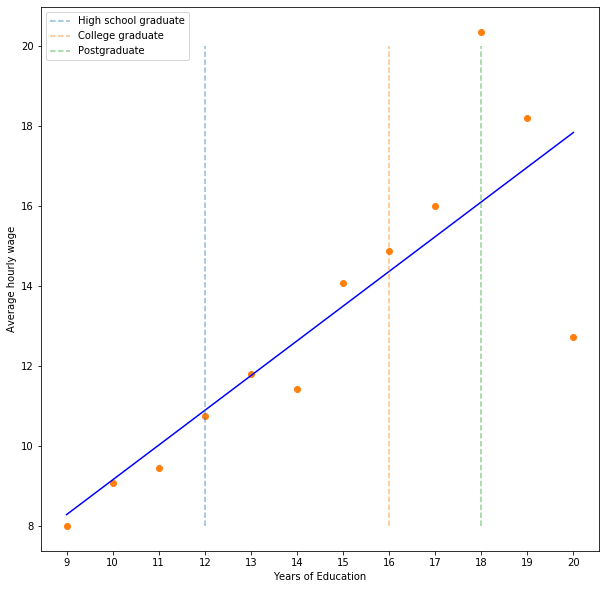

In [15]:
# library setup
from matplotlib import pyplot as plt

# set the style
plt.style.use('fast')

# create the figure
fig = plt.figure(figsize=(10,10))

# populate the figure with a plot
ax = fig.add_subplot(1,1,1)

# data
x = df_m['EDUC']
y = df_m['WAGE']

# plot the chart
ax.scatter(x, y, c="tab:orange")

# axes label
ax.set_ylabel('Average hourly wage')
ax.set_xlabel('Years of Education')

# tick labels
plt.xticks(range(9,21))

# Adding a best fit line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, c='blue')

# add additional lines
line1 = plt.plot([12,12],[8,20], alpha = 0.5, c ='C0', linestyle = '--' , label = "High school graduate")
line2 = plt.plot([16,16],[8,20], alpha = 0.5, c ='C1', linestyle = '--' , label = "College graduate")
line3 = plt.plot([18,18],[8,20], alpha = 0.5, c ='C2', linestyle = '--' , label = "Postgraduate")

#adding a legend
ax.legend(loc = 'upper left')

plt.show()

My solution

In [5]:
# conditional DataFrame smapling many values - grouped displayed
# selecting n rows of sample from each educational level from the DataFrame
col = 'EDUC'
sample = []

variants = list(df[col].dropna().unique())
print(variants)

# there are 12 type of variants in the csv file
# for the purpose of this assingment, we want a sample size of 15 data points per educational level

for typ in variants:
    sample.append(df[df[col] == typ].sample(n=15))

# create a new data frame for our sample
df2 = pd.concat(sample)
df2.info()

[13, 18, 15, 10, 12, 19, 11, 14, 16, 17, 20, 9]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 13088 to 16667
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PERSONID   180 non-null    int64  
 1   EDUC       180 non-null    int64  
 2   LOGWAGE    180 non-null    float64
 3   POTEXPER   180 non-null    int64  
 4   TIMETRND   180 non-null    int64  
 5   ABILITY    180 non-null    float64
 6   MOTHERED   180 non-null    int64  
 7   FATHERED   180 non-null    int64  
 8   BRKNHOME   180 non-null    int64  
 9   SIBLINGS   180 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 15.5 KB


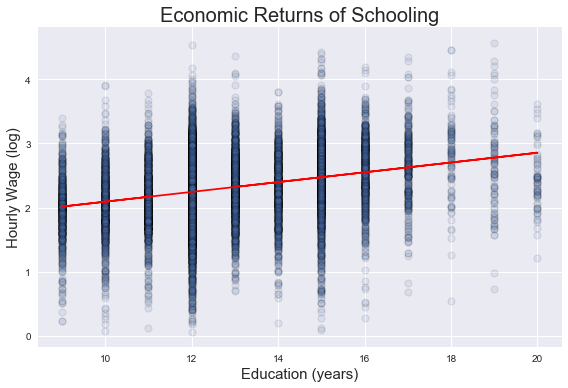

In [19]:
# library setup
from matplotlib import pyplot as plt

# scatter plot style
plt.style.use('seaborn')

# data
education = df['EDUC']
wage = df['LOGWAGE']
#ability = df['ABILITY']

# add size arguement
plt.scatter(x=education, y=wage, cmap="Greens", 
            edgecolor='black', linewidth=1, alpha=0.1)

# Adding a best fit line
m, b = np.polyfit(education, wage, 1)
plt.plot(education, m*education + b, c='red')

# Adding a label to your graph
#cbar = plt.colorbar()
#cbar.set_label("Ability",fontsize=15)

plt.title('Economic Returns of Schooling',fontsize=20)
plt.xlabel('Education (years)',fontsize=15)
plt.ylabel('Hourly Wage (log)',fontsize=15)

plt.tight_layout()

plt.show()